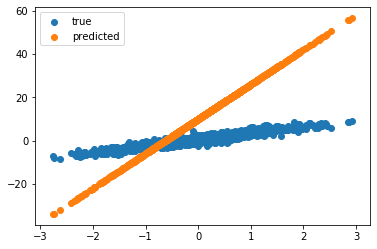

Epoch 0: Loss: 267.6490478515625
Epoch 1: Loss: 169.09190368652344
Epoch 2: Loss: 106.98929595947266
Epoch 3: Loss: 67.85436248779297
Epoch 4: Loss: 43.1909065246582
Epoch 5: Loss: 27.64632225036621
Epoch 6: Loss: 17.848234176635742
Epoch 7: Loss: 11.671740531921387
Epoch 8: Loss: 7.777859210968018
Epoch 9: Loss: 5.322783946990967
Epoch 10: Loss: 3.7747180461883545
Epoch 11: Loss: 2.7984721660614014
Epoch 12: Loss: 2.1827640533447266
Epoch 13: Loss: 1.794400930404663
Epoch 14: Loss: 1.5494096279144287
Epoch 15: Loss: 1.3948429822921753
Epoch 16: Loss: 1.2973144054412842
Epoch 17: Loss: 1.2357679605484009
Epoch 18: Loss: 1.1969232559204102
Epoch 19: Loss: 1.17240309715271


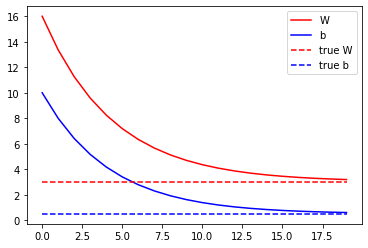

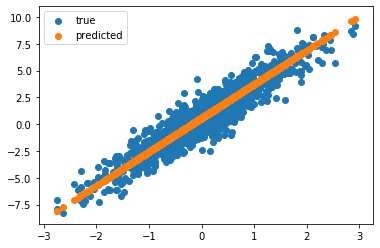

In [5]:
# Reference
# https://sanjayasubedi.com.np/deeplearning/tensorflow-2-linear-regression-from-scratch/

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class Model:
    def __init__(self):
        self.W = tf.Variable(16.0)
        self.b = tf.Variable(10.0)
    
    def __call__(self, x):
        return self.W * x + self.b

    
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y-y_pred))

def train(model, X, y, lr=0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(X))
        
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(lr * dW)
    model.b.assign_sub(lr * db)

model = Model()
model(20)

TRUE_W = 3.0
TRUE_b = 0.5 
NUM_SAMPLE = 1000

X = tf.random.normal(shape=(NUM_SAMPLE,))
noise = tf.random.normal(shape=(NUM_SAMPLE,))
y = X * TRUE_W + TRUE_b + noise

plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()
plt.show()

model = Model()
Ws, bs = [], []
epochs = 20
for epoch in range(epochs):
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    
    current_loss = loss(y, model(X))
    train(model, X, y, lr=0.1)
    print(f"Epoch {epoch}: Loss: {current_loss.numpy()}")
    
plt.plot(range(epochs), Ws, 'r', range(epochs), bs, 'b')
plt.plot([TRUE_W] * epochs, 'r--', [TRUE_b] * epochs, 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()
plt.show()


    